#### Fashion MNIST is a drop-in replacement for the very well known, machine learning hello world, MNIST dataset. It has same number of training and test examples and the images have the same 28x28 size and there are a total of 10 classes/labels, you can read more about the dataset here : Fashion-MNIST

#### In this I have tried an custom Neural Network on the above dataset. 

### Network Structure

#### I have designed a two layer Neural Network, First layer will be the input layer having 784 input neurons and relu as the activation function. The second layer having 512 Neurons and activation function as relu and the last layer having 128 neurons and activation as softmax.

In [21]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import os
import gzip
np.random.seed(12345)


In [6]:
batch_size = 16

In [7]:
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')

8192/5148 [===============================================] - 0s 0us/step


In [10]:
def load_data(images_path, labels_path):

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [11]:
X_train, y_train = load_data(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [15]:
print (X_train[0, :])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627452 

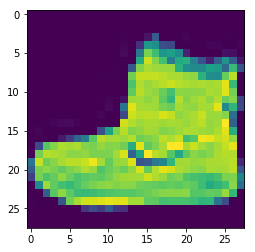

In [16]:
plt.imshow(X_train[0, :].reshape((28, 28)))

In [22]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1)

Epoch 1/20
60000/60000 [==============================] - 19s 318us/step - loss: 0.4755 - acc: 0.8272
Epoch 2/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.3579 - acc: 0.8680
Epoch 3/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.3255 - acc: 0.8788
Epoch 4/20
60000/60000 [==============================] - 19s 317us/step - loss: 0.3015 - acc: 0.8871
Epoch 5/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.2848 - acc: 0.8921
Epoch 6/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.2714 - acc: 0.8978
Epoch 7/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.2598 - acc: 0.9023
Epoch 8/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.2512 - acc: 0.9057
Epoch 9/20
60000/60000 [==============================] - 19s 310us/step - loss: 0.2393 - acc: 0.9086
Epoch 10/20
60000/60000 [==============================] - 19s 311us/step - loss: 

In [24]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3539742024064064
Test accuracy: 0.8924
